Number of features: 132
High correlation between MagpieData minimum Number and MagpieData minimum AtomicWeight: 1.00
High correlation between MagpieData maximum Number and MagpieData maximum AtomicWeight: 1.00
High correlation between MagpieData range Number and MagpieData range AtomicWeight: 1.00
High correlation between MagpieData mean Number and MagpieData mean AtomicWeight: 1.00
High correlation between MagpieData avg_dev Number and MagpieData avg_dev AtomicWeight: 1.00
High correlation between MagpieData mode Number and MagpieData mode AtomicWeight: 1.00
High correlation between MagpieData minimum NsValence and MagpieData range NsValence: -1.00
High correlation between MagpieData maximum NfValence and MagpieData range NfValence: 1.00
High correlation between MagpieData maximum NsUnfilled and MagpieData range NsUnfilled: 1.00
High correlation between MagpieData maximum NdUnfilled and MagpieData range NdUnfilled: 1.00
High correlation between MagpieData maximum NfUnfilled and Magpie

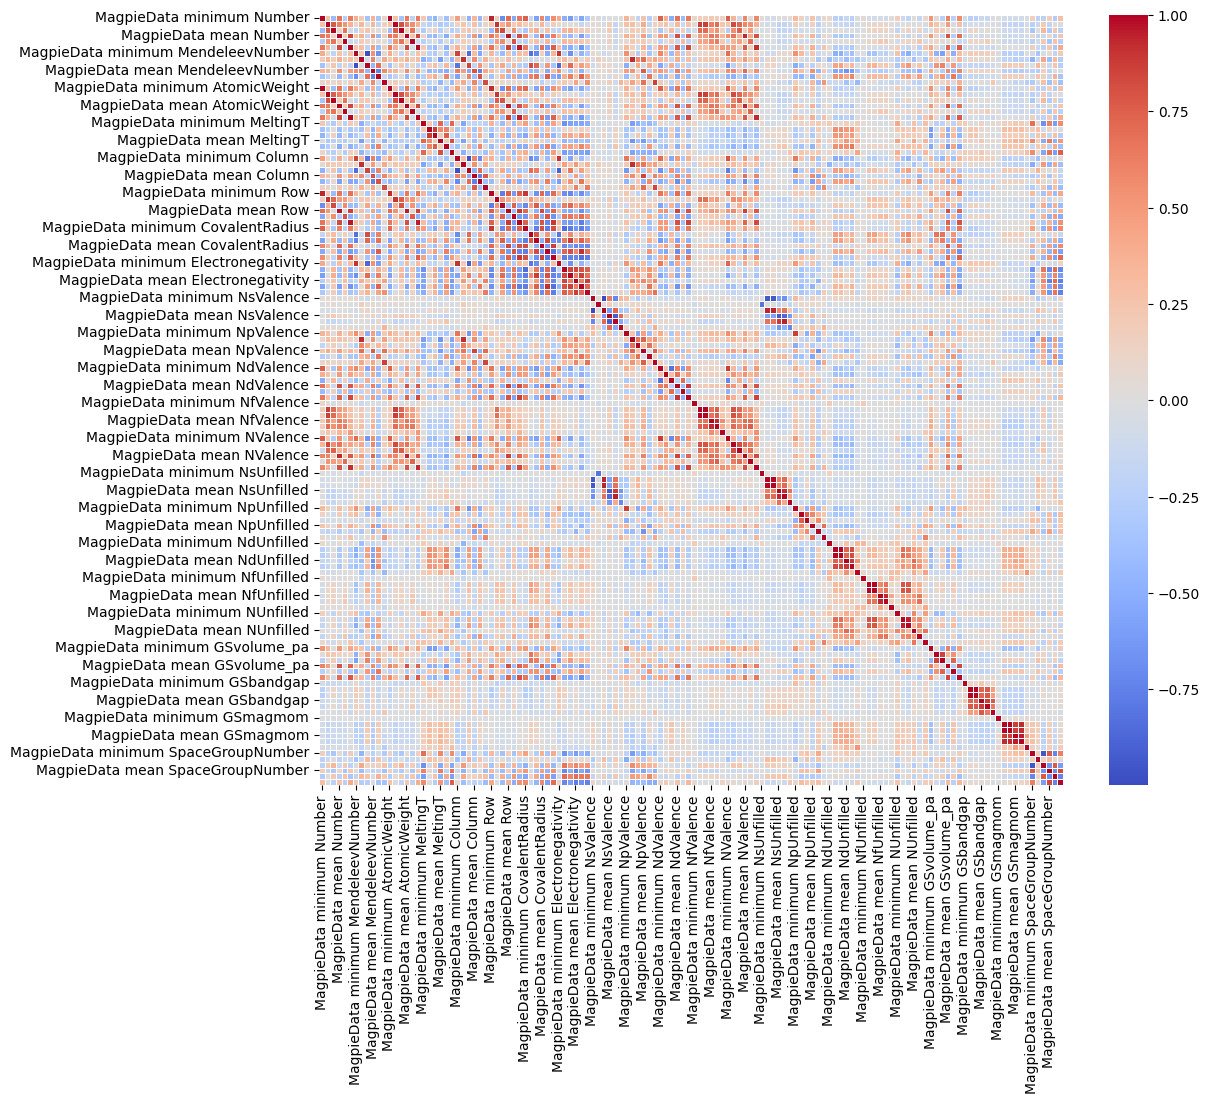

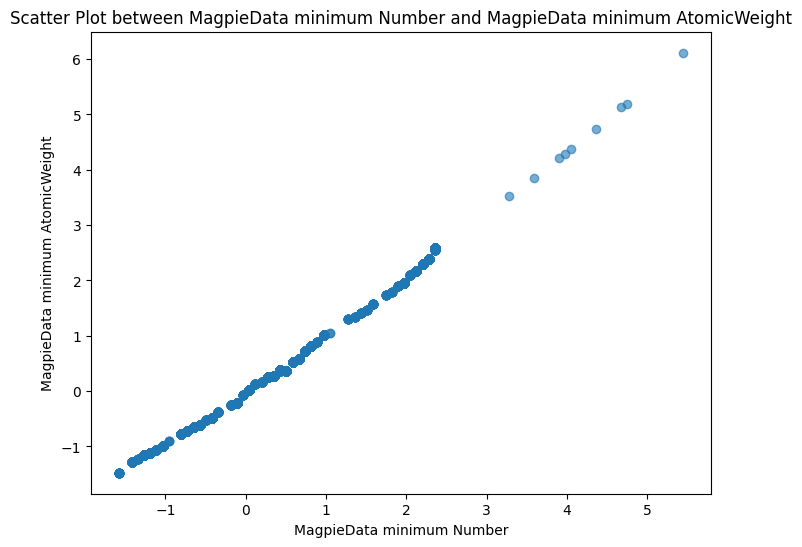

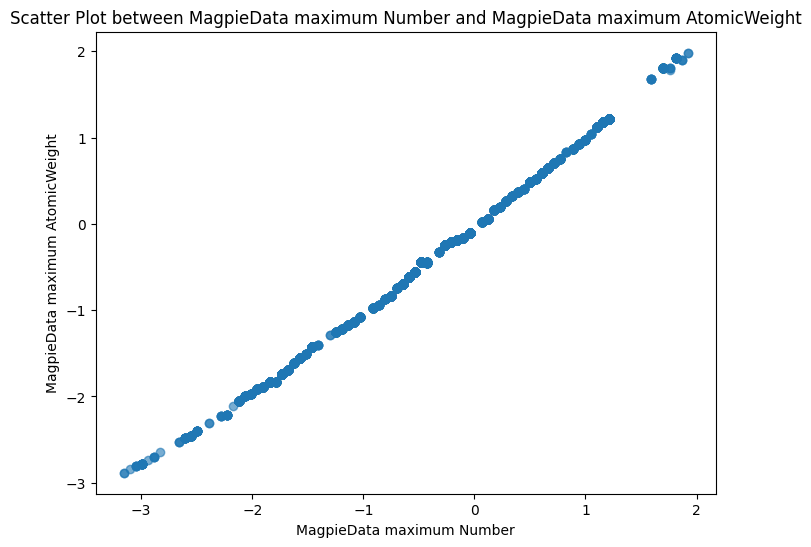

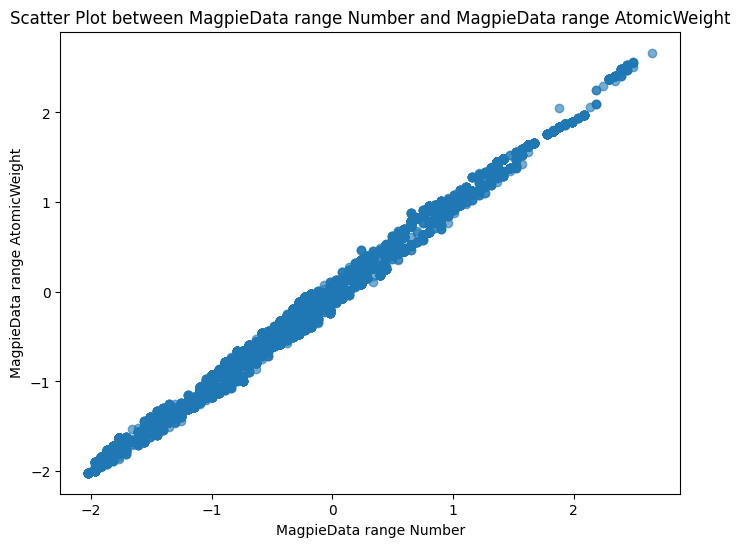

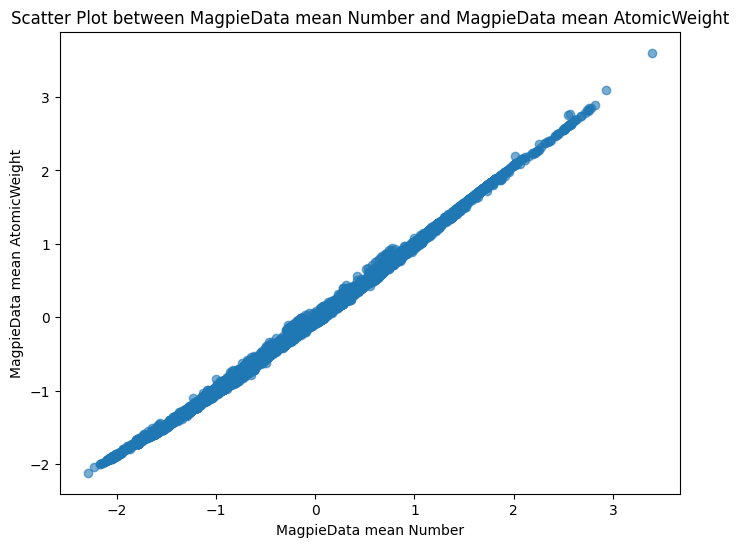

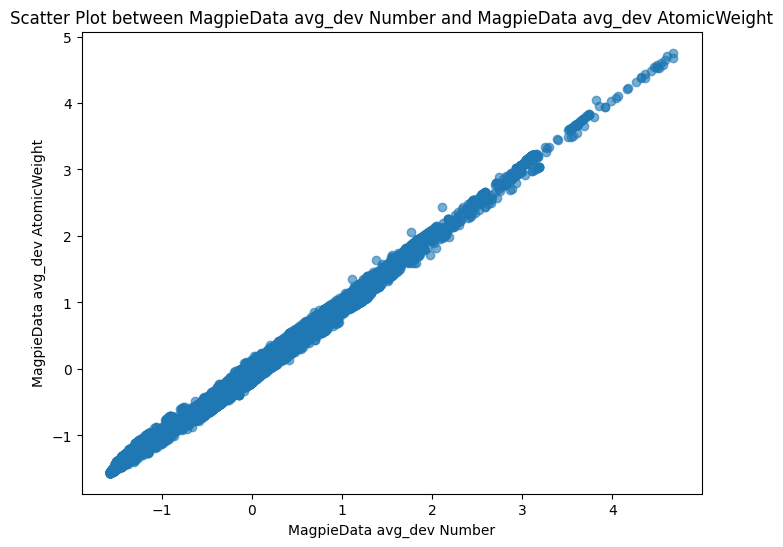

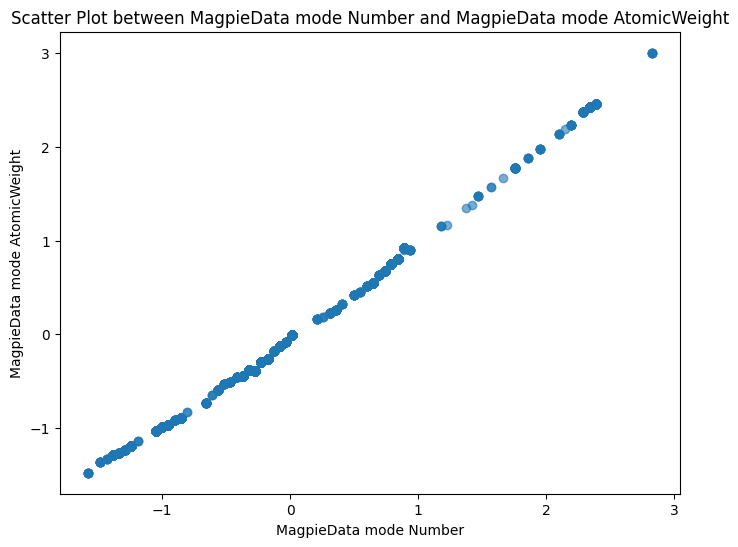

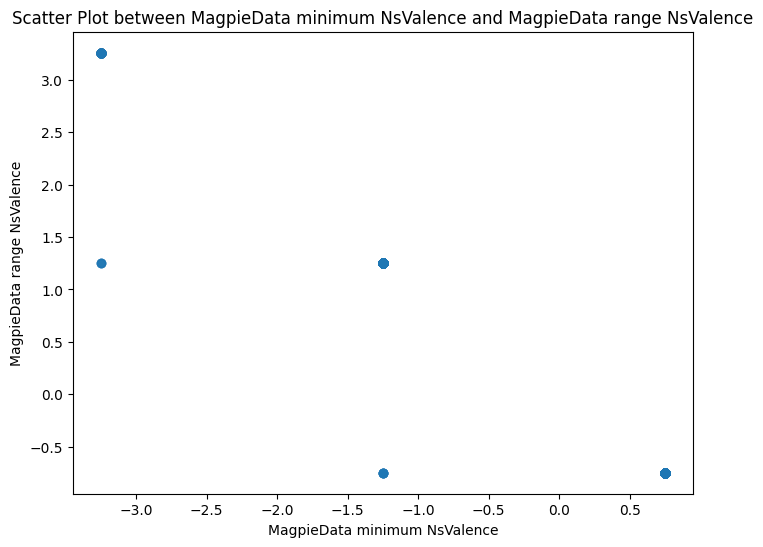

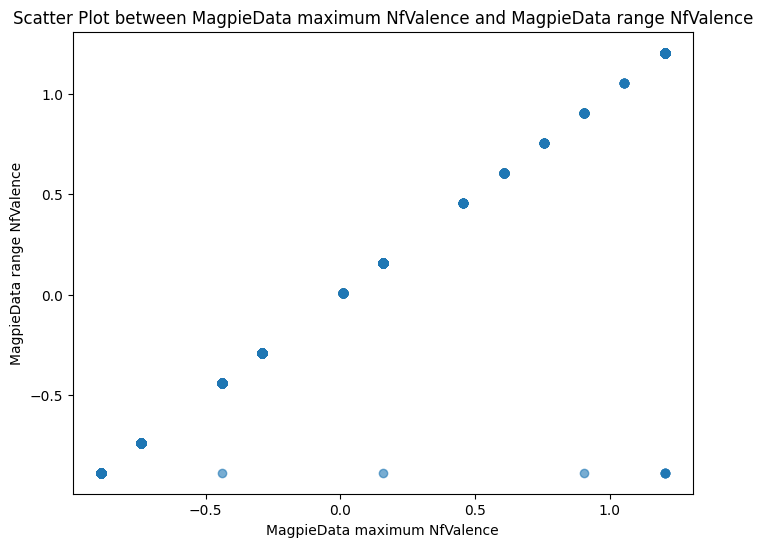

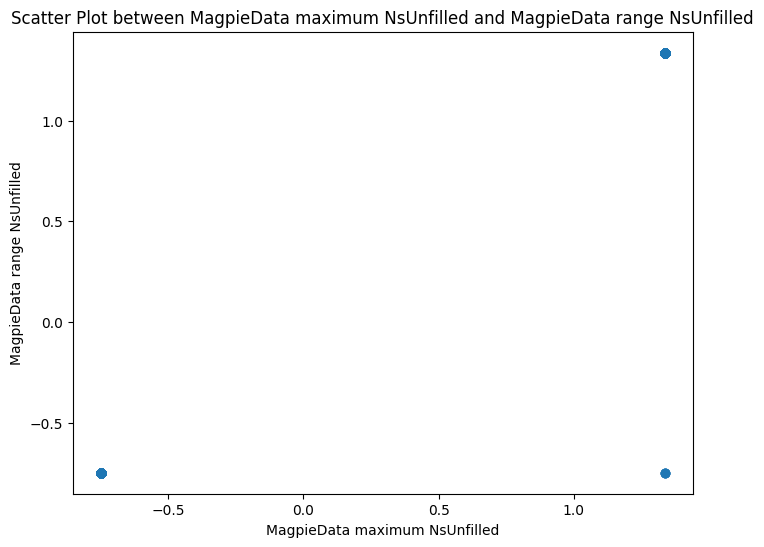

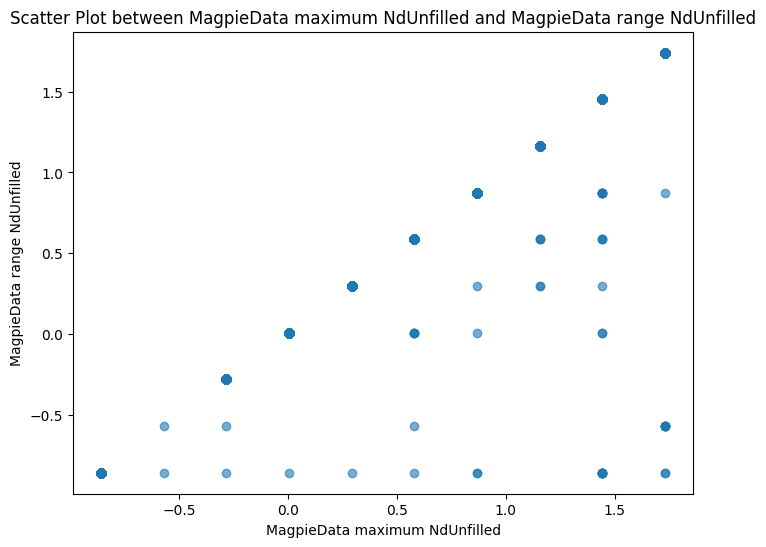

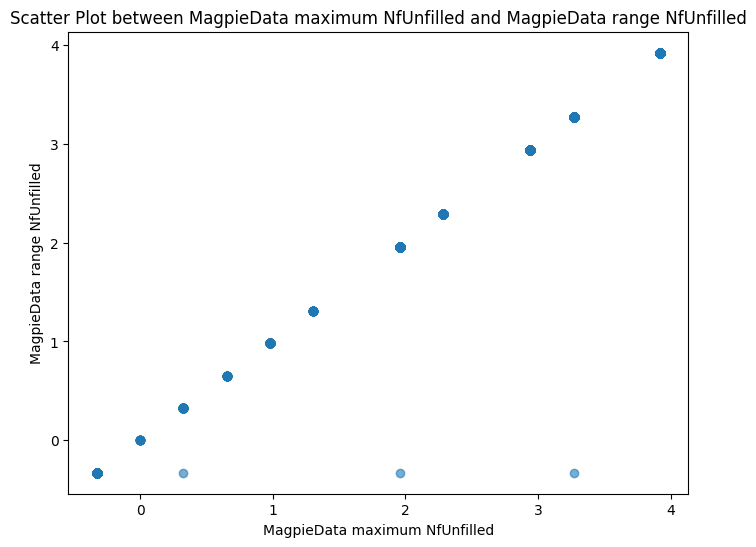

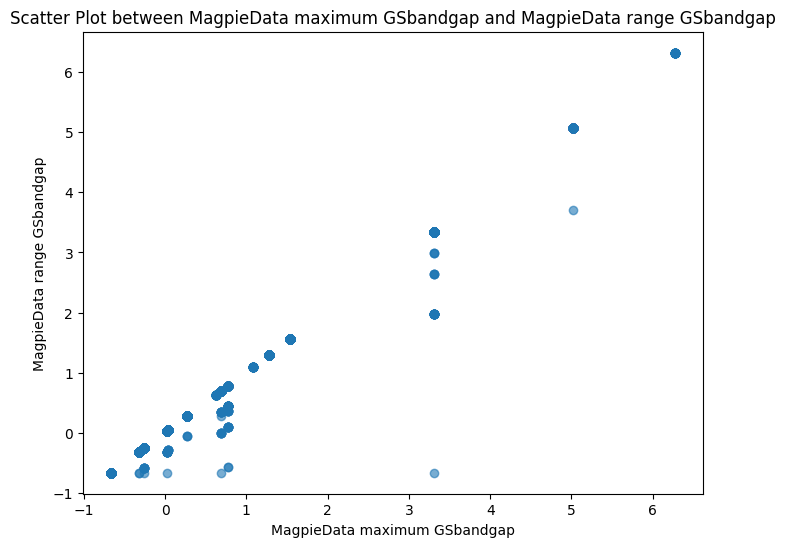

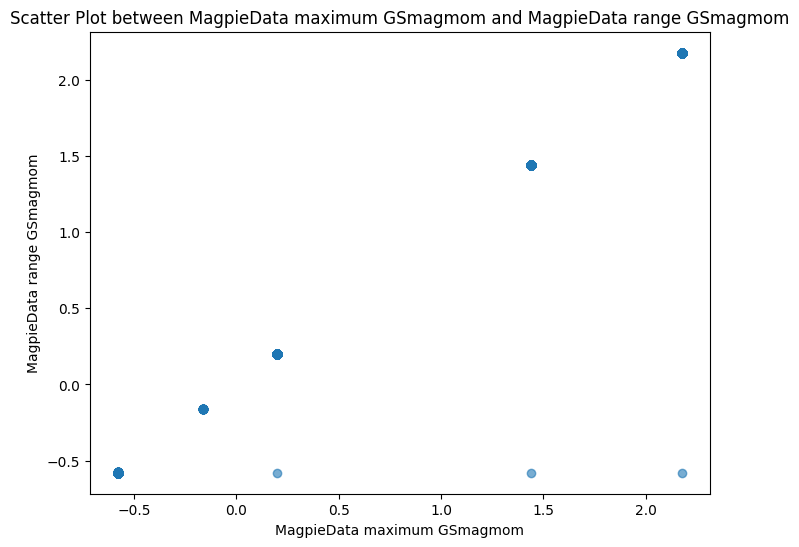

Removed features: ['MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range AtomicWeight', 'MagpieData mean Number', 'MagpieData range NsUnfilled', 'MagpieData maximum NfValence', 'MagpieData avg_dev Number', 'MagpieData maximum NdUnfilled', 'MagpieData minimum NsValence', 'MagpieData maximum NfUnfilled', 'MagpieData maximum GSbandgap', 'MagpieData mode Number', 'MagpieData maximum GSmagmom']
Number of features in the final dataset: 120


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
import joblib

# Load data and keep only unique entries based on 'composition' column
df = pd.read_csv("../training_data.csv")
df_unique = df.drop_duplicates(subset='composition', keep='first').reset_index(drop=True)

# Save 'composition' column separately
composition_column = df_unique['composition']

# Cleaned dataframe: Drop unnecessary columns, including 'composition'
columns_to_drop = ['composition', 'sample_id', 'prop_x', 'prop_y', 'unit_x', 'unit_y', 'Temperature', 
                   'Thermal Conductivity', 'comp_obj', 'atomic_fractions', 'group', 'class']
df_cleaned = df_unique.drop(columns=columns_to_drop)

# Get number of features
num_features = df_cleaned.shape[1]
print(f"Number of features: {num_features}")

# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_cleaned)
df_scaled = pd.DataFrame(scaled_features, columns=df_cleaned.columns)

# Save the scaler for future use
joblib.dump(scaler, "scaler.pkl")

# Pearson correlation test
corr_matrix = df_scaled.corr(method='pearson')

# Find pairs with correlation higher than 0.99 in absolute value
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.99:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Print pairs with high correlation
for pair in high_corr_pairs:
    print(f"High correlation between {pair[0]} and {pair[1]}: {pair[2]:.2f}")

# Plot heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

# Highlight pairs with high correlation using a scatter plot
for pair in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scaled[pair[0]], df_scaled[pair[1]], alpha=0.6)
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f'Scatter Plot between {pair[0]} and {pair[1]}')
    plt.show()

# Set random seed for reproducibility
random.seed(42)

# Remove one feature from each highly correlated pair
features_to_remove = []
for pair in high_corr_pairs:
    feature_to_remove = random.choice(pair[:2])
    features_to_remove.append(feature_to_remove)

# Remove duplicate features from the list
features_to_remove = list(set(features_to_remove))

# Drop the selected features from the dataframe
df_final = df_scaled.drop(columns=features_to_remove)

# Print removed features
print(f"Removed features: {features_to_remove}")

# Add 'composition' column back to the final dataframe without resetting the index
df_final['composition'] = composition_column

# Save the final dataframe to a CSV file
df_final.to_csv("training_data_post_pearson.csv", index=False)

# Print number of features in the new CSV file
print(f"Number of features in the final dataset: {df_final.shape[1]}")

In [2]:
df_final.head()

,MagpieData range Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData mean AtomicWeight,...,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber,composition
0,-0.430705,1.330041,0.669133,-1.234795,1.126227,-0.859018,0.091497,2.579090,1.213349,1.892513,...,-0.506453,-0.542051,-0.153648,-0.986965,0.34705,1.108179,0.763377,-0.193135,0.301098,Bi0.03PbTe
1,1.367075,1.330041,0.471395,-1.272517,1.066968,-0.918646,0.091497,-0.480026,1.177240,1.239978,...,-0.506453,-0.542051,-0.153648,-0.959347,0.34705,1.080321,-0.564630,1.762884,1.240392,Pb1.003Se0.92S0.08
2,0.493867,1.330041,0.669133,-1.234795,1.097850,-0.899562,0.091497,1.021594,1.213349,1.448039,...,-0.506453,-0.542051,-0.153648,-0.986965,0.34705,1.108179,-0.247195,1.351151,1.240392,Pb0.96Bi0.02Te0.3Se0.7
3,0.442502,1.330041,0.669133,-1.234795,1.112049,-0.867176,0.091497,1.021594,1.177240,1.728973,...,-0.506453,-0.542051,-0.153648,-0.959347,0.34705,1.080321,0.459547,0.266777,1.240392,Pb1Te0.75Se0.25
4,1.418440,1.330041,0.669133,-1.234795,1.113762,-0.867587,0.091497,-0.480026,1.213349,1.737567,...,-0.506453,-0.542051,-0.153648,-0.986965,0.34705,1.108179,0.705684,-0.097226,1.240392,Bi0.0044Pb0.9956Te0.88S0.12
